<a href="https://colab.research.google.com/github/SMKProj/StocksDataAnalysis/blob/main/StocksDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The projects is based on stocks data of Apple, Google, IBM and Microsoft and performs exploratory data analysis to answer following questions.


- what was the change in price of stocks over time?
- what are the moving averages for 10,20,50 and 100 window size for various stocks?
- compare the percentage change of various stock prices and computing percentage change for stocks annualy, quaterly, monthly and daily
- to observe if closing price of each individual stocks are correlated?
- to investigate if daily change in closing price of stocks or daily returns in stocks are correlated or not?










In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

data = files.upload()

Saving AAPL_data.csv to AAPL_data.csv
Saving GOOGL_data.csv to GOOGL_data.csv
Saving IBM_data.csv to IBM_data.csv
Saving MSFT_data.csv to MSFT_data.csv


In [132]:
df = pd.DataFrame()
for f in data:
  file = pd.read_csv(f)
  df = file.append(df, ignore_index=True)

<ipython-input-132-167fe10171ee>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = file.append(df, ignore_index=True)
<ipython-input-132-167fe10171ee>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = file.append(df, ignore_index=True)
<ipython-input-132-167fe10171ee>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = file.append(df, ignore_index=True)
<ipython-input-132-167fe10171ee>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = file.append(df, ignore_index=True)


In [ ]:
df.shape

In [133]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [6]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [7]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

**What was the change in price of stock overtime**

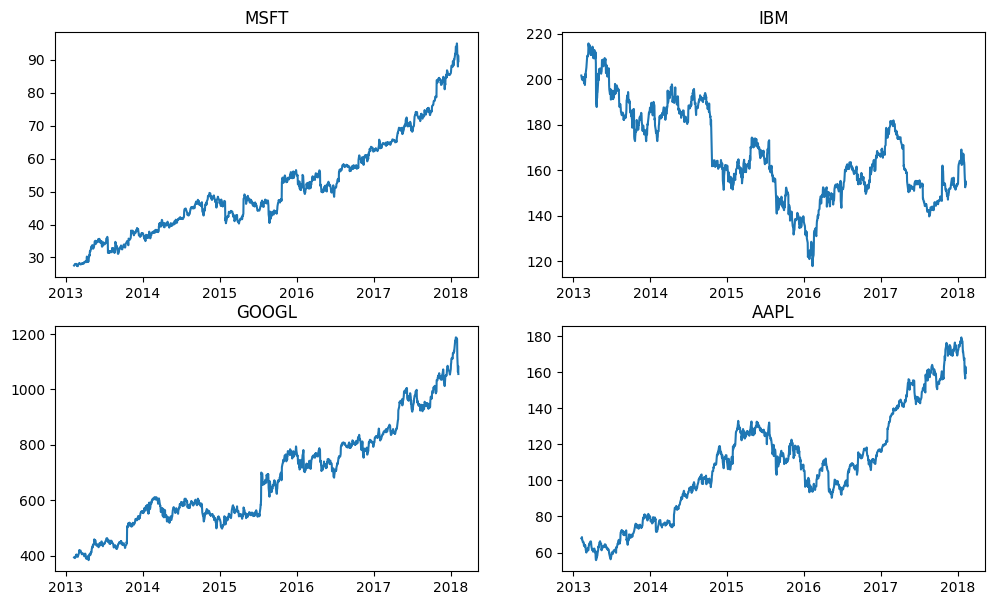

In [10]:
cList = df['Name'].unique()
plt.figure(figsize=(12,7))
for c in range(0,len(cList)):
  comp = df[df['Name'] == cList[c]]
  ax = 'ax'+str(c+1)
  ax = plt.subplot(2,2,c+1)
  ax.set_title(str(cList[c]))
  #plt.title = comp['Name']
  plt.plot(comp['date'], comp['close'])

**What are the moving averages of various stocks**

In [11]:
newdf = df.copy()

In [12]:
ma_win = [10,20,50,100]

for m in ma_win:
  cw = 'close_'+str(m)
  newdf[cw] = newdf['close'].rolling(m).mean()

In [13]:
newdf.tail()

,date,open,high,low,close,volume,Name,close_10,close_20,close_50,close_100
5031,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252,166.9647
5032,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356,166.9547
5033,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026,166.9110
5034,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640,166.9448
5035,2018-02-07,163.085,163.40,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554,166.9574


In [14]:
newdf.set_index(newdf['date'],inplace=True)

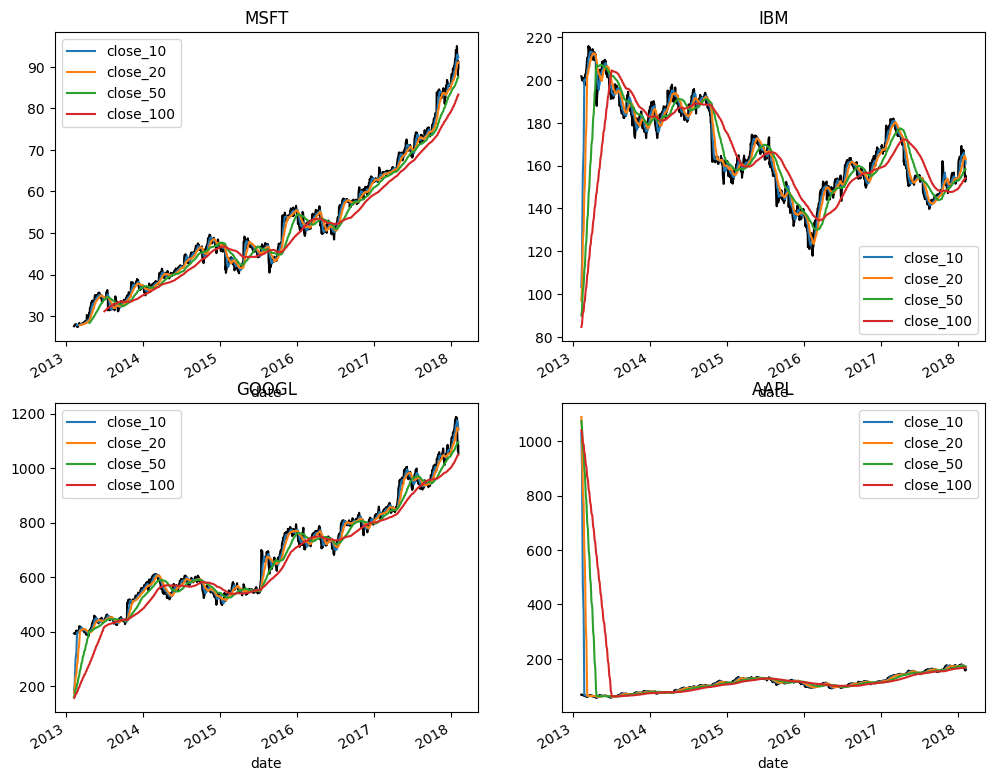

In [22]:
plt.figure(figsize=(12,10))
for index,company in enumerate(cList,1):
  ax = plt.subplot(2,2,index)
  ndf = newdf[newdf['Name'] == company]
  ax.set_title(str(company))
  plt.plot(ndf['date'], ndf['close'], 'k')
  ndf[['close_10', 'close_20', 'close_50', 'close_100']].plot(ax=plt.gca())


**Computing percentage change for Apples Stocks**

In [23]:
apple_df = pd.read_csv('AAPL_data.csv')

In [154]:
pct_change_comp = pd.DataFrame()
for c in cList:
  comp = df[df['Name'] == c]
  field = str(c)+'%dailyReturns'
  pct_change_comp[field]=comp['close'].pct_change()*100


In [24]:
apple_df['%dailyReturns'] = apple_df['close'].pct_change()*100

In [156]:
pct_change_comp

,MSFT%dailyReturns,IBM%dailyReturns,GOOGL%dailyReturns,AAPL%dailyReturns
date,,,,
2013-02-08,NaN,NaN,NaN,NaN
2013-02-11,1.125227,-0.753669,-0.375625,1.042235
2013-02-12,0.071788,-0.059952,-0.219841,-2.506658
2013-02-13,0.538020,0.024995,0.276680,-0.190297
2013-02-14,0.035676,-0.219901,0.633579,-0.089934
...,...,...,...,...
2018-02-01,-0.789391,-0.794136,-0.053290,0.209043
2018-02-02,-2.631021,-2.075123,-5.280173,-4.339015
2018-02-05,-4.118544,-4.087279,-5.075947,-2.498442


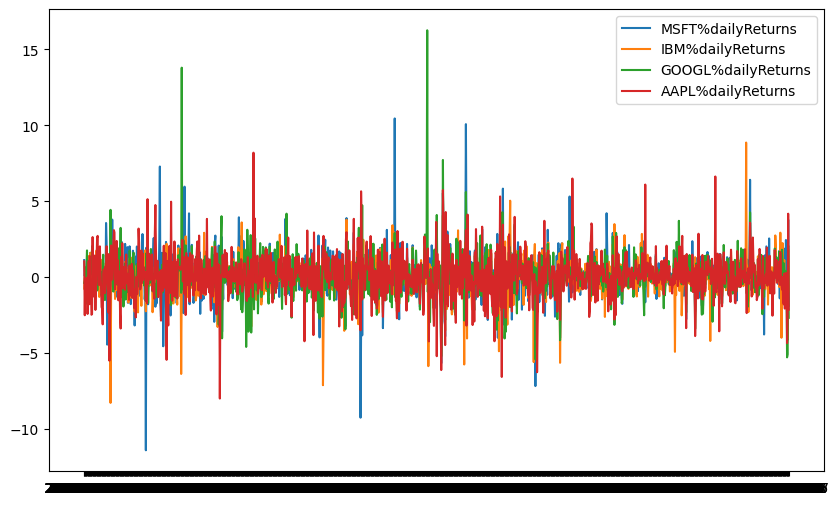

In [176]:
plt.figure(figsize=(10,6))
plt.plot(pct_change_comp.index, pct_change_comp)
plt.legend(pct_change_comp.columns)

In [168]:
pct_change_comp.columns

Index(['MSFT%dailyReturns', 'IBM%dailyReturns', 'GOOGL%dailyReturns',
       'AAPL%dailyReturns'],
      dtype='object')

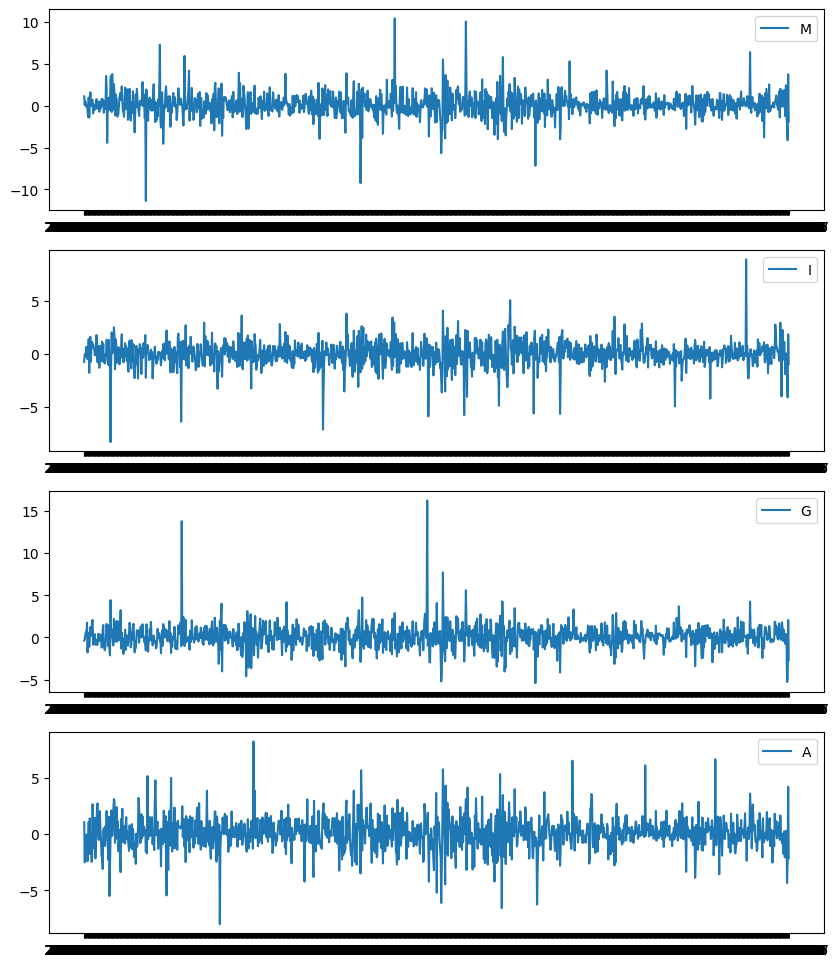

In [175]:
plt.figure(figsize=(10,12))
for i,p in enumerate(pct_change_comp.columns,1):
  plt.subplot(4,1,i)
  plt.plot(pct_change_comp.index, pct_change_comp[p])
  plt.legend(p)

**Performing Resampling Analysis of Closing Price**

In [27]:
apple_df['date']=pd.to_datetime(apple_df['date'])

In [28]:
apple_df.head(3)

,date,open,high,low,close,volume,Name,%dailyReturns
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658


In [29]:
apple_df.set_index(apple_df['date'],inplace=True)
apple_df.head(3)

,date,open,high,low,close,volume,Name,%dailyReturns
date,,,,,,,,
2013-02-08,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658


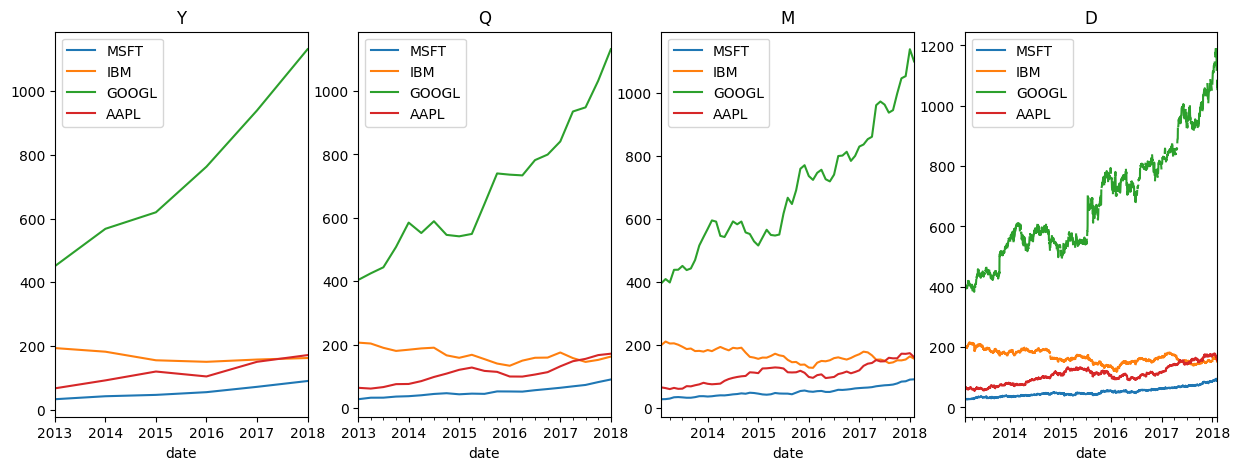

In [52]:
timeseries = ['Y','Q','M','D']

plt.figure(figsize=(15,5))
for i,t in enumerate(timeseries,1):
  for c in cList:
    df2 = newdf[newdf['Name'] == c]
    ax = 'ax'+str(i)
    ax = plt.subplot(1,4,i)
    ax.set_title(t)
    df2['close'].resample(t).mean().plot()
    plt.legend(cList)


**Comparing if closing prices of companies are correlated or not?**

In [140]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [141]:
df = df.set_index(df['date'])

In [55]:
cList

array(['MSFT', 'IBM', 'GOOGL', 'AAPL'], dtype=object)

In [142]:
for c in cList:
  if c =='MSFT':
    msft=  df[df['Name'] == c]
  elif c =='GOOGL':
    google = df[df['Name'] == c]
  elif c == 'IBM':
    ibm = df[df['Name'] == c]
  elif c == 'AAPL':
    apple = df[df['Name'] == c]

In [143]:
closing_price = pd.DataFrame({'MSFT_CLosing':msft['close'],
                              'APPLE_Closing': apple['close'],
                              'GOOGLE_Closing': google['close'],
                              'IBM_Closing': ibm['close']})

In [144]:
closing_price.head()

,MSFT_CLosing,APPLE_Closing,GOOGLE_Closing,IBM_Closing
date,,,,
2013-02-08,27.55,67.8542,393.0777,201.68
2013-02-11,27.86,68.5614,391.6012,200.16
2013-02-12,27.88,66.8428,390.7403,200.04
2013-02-13,28.03,66.7156,391.8214,200.09
2013-02-14,28.04,66.6556,394.3039,199.65


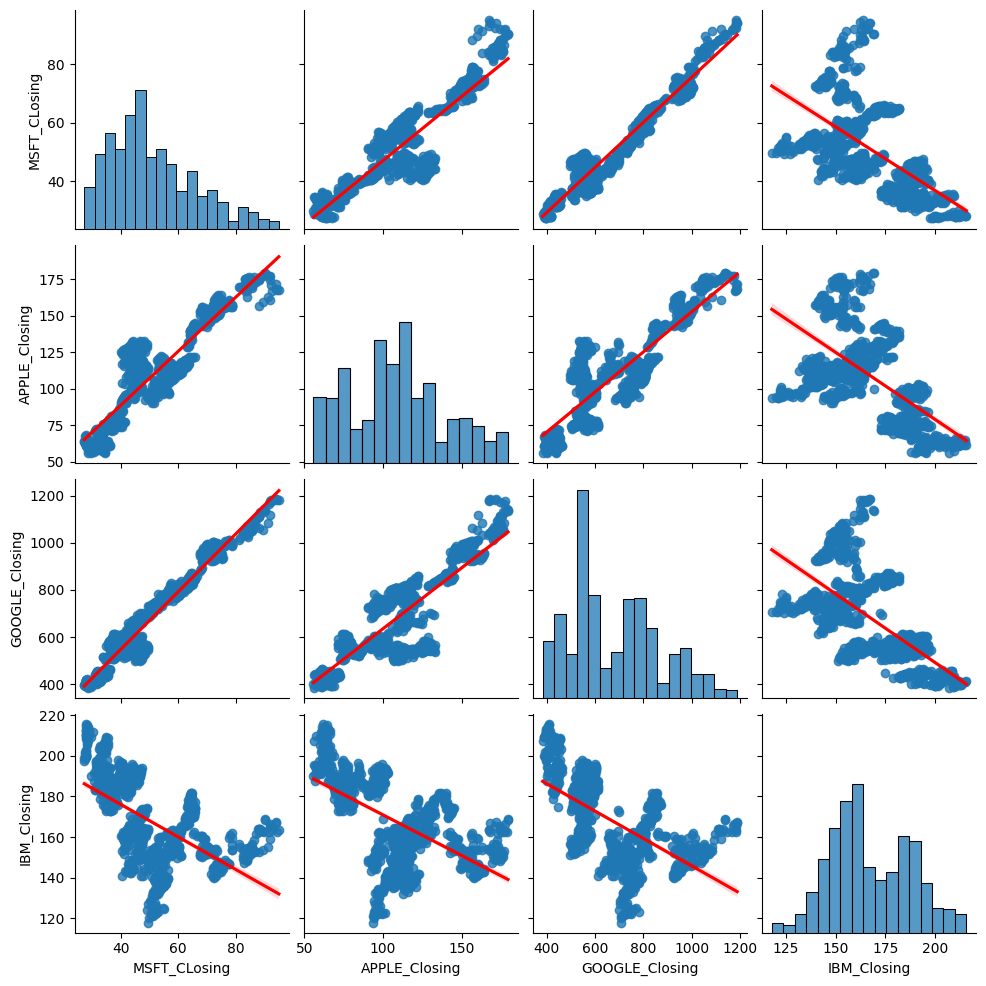

In [147]:
sns.pairplot(closing_price,kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [148]:
closing_price.corr()

,MSFT_CLosing,APPLE_Closing,GOOGLE_Closing,IBM_Closing
MSFT_CLosing,1.000000,0.899689,0.970779,-0.589466
APPLE_Closing,0.899689,1.000000,0.843736,-0.606435
GOOGLE_Closing,0.970779,0.843736,1.000000,-0.626969
IBM_Closing,-0.589466,-0.606435,-0.626969,1.000000


<Axes: >

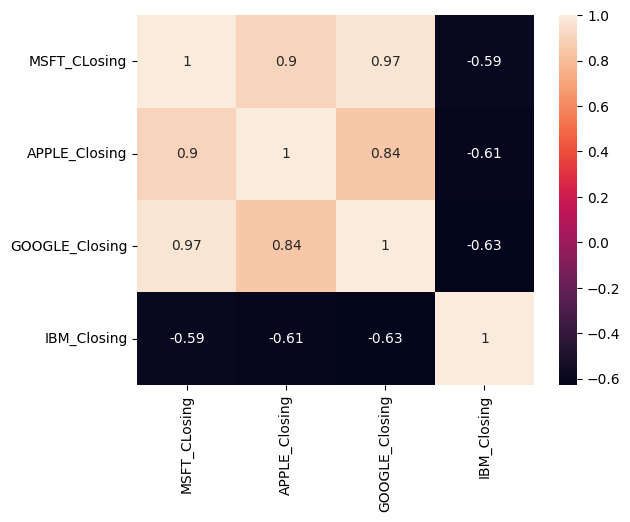

In [106]:
sns.heatmap(closing_price.corr(), annot=True)

**Exploring if daily change in closing price of stocks or daily returns in stocks are correlated or not**

In [149]:
df.head()

,date,open,high,low,close,volume,Name
date,,,,,,,
2013-02-08,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
2013-02-11,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2013-02-12,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
2013-02-13,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
2013-02-14,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [110]:
cList

array(['MSFT', 'IBM', 'GOOGL', 'AAPL'], dtype=object)

In [150]:
pct_change = pd.DataFrame()
for c in cList:
  comp = df[df['Name'] == c]
  field = str(c)+'_pctChange'
  pct_change[field]=comp['close'].pct_change()*100

In [151]:
pct_change

,MSFT_pctChange,IBM_pctChange,GOOGL_pctChange,AAPL_pctChange
date,,,,
2013-02-08,NaN,NaN,NaN,NaN
2013-02-11,1.125227,-0.753669,-0.375625,1.042235
2013-02-12,0.071788,-0.059952,-0.219841,-2.506658
2013-02-13,0.538020,0.024995,0.276680,-0.190297
2013-02-14,0.035676,-0.219901,0.633579,-0.089934
...,...,...,...,...
2018-02-01,-0.789391,-0.794136,-0.053290,0.209043
2018-02-02,-2.631021,-2.075123,-5.280173,-4.339015
2018-02-05,-4.118544,-4.087279,-5.075947,-2.498442


In [152]:
pct_change.corr()

,MSFT_pctChange,IBM_pctChange,GOOGL_pctChange,AAPL_pctChange
MSFT_pctChange,1.000000,0.363277,0.488373,0.366598
IBM_pctChange,0.363277,1.000000,0.318281,0.263927
GOOGL_pctChange,0.488373,0.318281,1.000000,0.348858
AAPL_pctChange,0.366598,0.263927,0.348858,1.000000


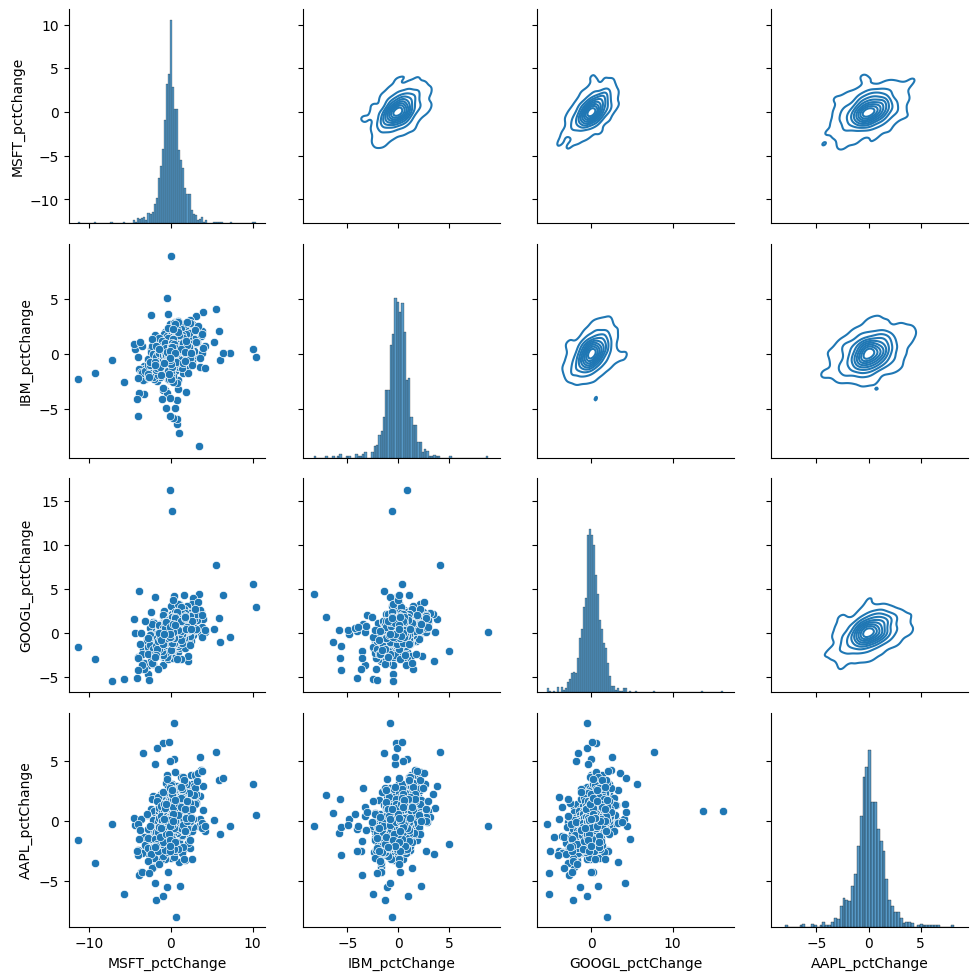

In [153]:
p = sns.PairGrid(pct_change)
p.map_diag(sns.histplot)
p.map_lower(sns.scatterplot)
p.map_upper(sns.kdeplot)